In [3]:
from Similarity.similarity import Similarity
from newsAPI.open_news_data import News_Fetcher
from Chirava.chirava import Scraper
from Assistant_Api.summarizer import Summarize_openAI, Summarize_Gemini

from pydantic import BaseModel
from typing import List,Optional
import matplotlib.pyplot as plt


d:\Educational\MACE\Final Project\Summarization\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
class Article(BaseModel):
    heading: Optional[str] = None
    content: Optional[str] = None
    date: Optional[str] = None
    url: Optional[str] = None
    source: Optional[str] = None
    urlToImage: Optional[str] = None
    Similarity: Optional[float] = None
    db_source: Optional[str] = None
    nlp_summary: Optional[str] = None

class News_Articles(BaseModel):
    prompt: str
    news_articles: list[Article]
    summary: Optional[str] = None

class Origin(BaseModel):
    name:str
    url:list[str]
    data:list[str]
    similarity:float

class Category(BaseModel):
    name:str
    query:str
    origin:list[Origin]


In [ ]:
def similarity(documents: list[str], prompt: str):
    sentences = [prompt]
    similarity = Similarity.document_similarity(documents, sentences).tolist()[0]

    return sum(similarity)/len(similarity)



In [ ]:
async def summarize(datas: list[str], prompt: str, model: str) -> str:
    articles = [Article(content=data[:900],heading="") for data in datas]
    if model == "gpt3.5":
        summary = await Summarize_openAI(articles, prompt)

    elif model == "gemini":
        summary = Summarize_Gemini(articles, prompt)

    return summary


In [ ]:
async def fetch_articles(query:str):
    get_news = News_Fetcher(query, 3)
    return News_Articles(prompt=query, news_articles=await get_news.runner())

async def scrape_articles(urls:List[str]):
        toBeScrapedArticles =[Article(url=url) for url in urls]
        scraper = Scraper(toBeScrapedArticles)
        articles =  await scraper.runner()
        print([article.content for article in articles if article.content])
        return [article.content if article.content else "" for article in articles ]
        


In [8]:

categories = [
    "Politics",
    "Technology",
    "Health",
    "Business",
    "Environment"
]
headlines = [
    "Global Leaders Convene for Climate Summit",
    "Breakthrough in Quantum Computing",
    "COVID-19 Variants Surge",
    "Gold Prices Surge to 6-Month High",
    "Amazon Rainforest Faces Record Deforestation"
]

for query in headlines:
    print(query)
    news  = await fetch_articles(query)
    for i in news.news_articles:
        print(i.url)



Global Leaders Convene for Climate Summit


NameError: name 'fetch_articles' is not defined

In [ ]:
# Analysis for news fetching
data = [
    Category(
        name="Politics",
        query="Global Leaders Convene for Climate Summit",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://time.com/6960844/time-reveals-the-2024-time-earth-awards/",
                    "https://www.forbes.com/sites/jonmcgowan/2024/03/27/blackrocks-fink-calls-for-energy-pragmatism-omits-esg-from-annual-letter/",
                    "https://www.forbes.com/sites/feliciajackson/2024/04/05/getting-the-food-system-ready-for-climate-shocks/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://www.washingtonpost.com/climate-environment/2023/12/02/cop28-climate-summit-dubai-world-leaders/",
                    "https://sdg.iisd.org/news/world-leaders-summit-at-cop-28-kicks-off-with-multiple-high-level-events/",
                    "https://www.nytimes.com/live/2023/12/01/climate/cop28-climate-change-summit",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://apnews.com/article/united-nations-antonio-guterres-climate-and-environment-f6e008b4e7956d6e1356a8e3e26789cf",
                    "https://www.bbc.com/news/science-environment-59105878",
                    "https://www.nytimes.com/live/2021/11/13/climate/cop26-glasgow-climate-summit",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Technology",
        query="Breakthrough in Quantum Computing",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://tech.slashdot.org/story/24/04/03/1338223/microsoft-and-quantinuum-say-theyve-ushered-in-the-next-era-of-quantum-computing",
                    "https://www.windowscentral.com/microsoft/what-we-did-here-gives-me-goosebumps-we-have-shown-that-error-correction-is-repeatable-it-is-working-and-it-is-reliable-microsoft-and-quantinuum-scale-new-heights-in-quantum-computing-and-error-correction",
                    "https://www.sciencedaily.com/releases/2024/04/240411130238.htm",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://www.sciencedaily.com/news/computers_math/quantum_computers/",
                    "https://www.advancedsciencenews.com/breakthrough-in-quantum-computing-with-stable-room-temperature-qubits/",
                    "https://www.forbes.com/sites/karlfreund/2023/06/14/ibm-achieves-breakthrough-in-quantum-computing/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://timesofindia.indiatimes.com/technology/tech-news/microsoft-and-quantinuum-have-teamed-up-in-the-race-for-quantum-supremacy/articleshow/109103007.cms",
                    "https://www.theweek.in/news/sci-tech/2024/04/12/data-privacy--secure-access-to-quantum-computing-from-home-now-p.html",
                    "https://www.msn.com/en-in/money/news/breakthrough-in-quantum-computing-microsoft-and-quantinuum-make-strides/ar-BB1l2Urk",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Health",
        query="COVID-19 Variants Surge",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://www.theatlantic.com/ideas/archive/2024/03/experts-failure-covid-19-pandemic/677816/?utm_source=feed",
                    "https://www.nakedcapitalism.com/2024/03/links-3-24-2024.html",
                    "https://sciencebasedmedicine.org/herdimmunitybyapri/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://timesofindia.indiatimes.com/city/delhi/no-need-to-panic-over-covid-surge-but-mask-up-say-doctors/articleshow/106193814.cms",
                    "https://www.thehindu.com/opinion/lead/responding-to-the-new-covid-19-sub-variants-now-and-in-future/article67696277.ece",
                    "https://www.livemint.com/news/world/covid-is-on-the-rise-as-who-alerts-virus-still-changing-evolving-as-jn-1-subvariant-cases-surges-11702865050415.html",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://www.nature.com/articles/d41586-022-01240-x",
                    "https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron",
                    "https://indianexpress.com/article/explained/explained-variants-and-the-covid-surge-7306408/",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Business",
        query="Gold Prices Surge to 6-Month High",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://survivalblog.com/2024/03/22/economics-investing-preppers-761/",
                    "https://www.abc.net.au/news/2024-03-15/bitcoin-mining-cryptocurrency-outback-iren/103587552",
                    "https://economictimes.indiatimes.com/markets/commodities/news/gold-price-today-yellow-metal-trades-near-lifetime-peak-what-should-traders-do/articleshow/108810102.cms",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://economictimes.indiatimes.com/markets/commodities/news/gold-prices-jump-rs-2800-per-10-grams-in-6-sessions-what-should-investors-do-now/articleshow/108290936.cms?from=mdr#:~:text=Synopsis,buying%20gold%20at%20elevated%20levels.&text=Gold%20has%20turned%20dearer%20by,by%20a%20six%2Dsession%20rally.",
                    "https://retail.economictimes.indiatimes.com/news/apparel-fashion/jewellery/gold-prices-rise-to-six-month-high/105546366",
                    "https://www.businesstoday.in/personal-finance/news/story/gold-prices-hit-a-six-month-high-move-above-2000-407377-2023-11-28",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://www.ft.com/content/72ae7a4a-83fe-4e55-8265-4278204c1d5d",
                    "https://edition.cnn.com/2024/04/09/economy/gold-prices-record-highs/index.html",
                    "https://abcnews.go.com/Business/gold-prices-hit-record-high-surge/story?id=109160900",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
    Category(
        name="Environment",
        query="Amazon Rainforest Faces Record Deforestation",
        origin=[
            Origin(
                name="Custom",
                url=[
                    "https://truthout.org/articles/big-oil-ignores-millions-of-climate-deaths-when-billions-in-profit-are-at-stake/",
                    "https://www.foxnews.com/science/tropical-forest-loss-decreased-2023-global-threats-remain-data-shows",
                    "https://www.ipsnews.net/2024/04/taking-charge-three-actions-help-combat-climate-change-save-amazonia/",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Google",
                url=[
                    "https://www.theguardian.com/world/2023/mar/10/brazil-record-deforestation-amazon-rainforest-lula-bolsonaro#:~:text=Government%20satellites%20show%20that%20a,the%20month%20since%20records%20began.",
                    "https://news.mongabay.com/2023/06/the-amazon-saw-record-deforestation-last-year-heres-why/",
                    "https://www.bbc.com/news/world-latin-america-67962297",
                ],
                data=[],
                similarity=0,
            ),
            Origin(
                name="Bing",
                url=[
                    "https://www.nature.com/immersive/d41586-023-02599-1/index.html",
                    "https://www.bbc.co.uk/news/science-environment-68032361",
                    "https://www.nbcnews.com/science/environment/amazons-crucial-water-cycle-faces-collapse-scientists-say-rcna138639",
                ],
                data=[],
                similarity=0,
            ),
        ],
    ),
]

#scraping and populating content

for category in data:
    for origin in category.origin:
        origin.data= await scrape_articles(origin.url)

data


In [ ]:
import random 
flag=True #set to false when actually being used

for category in data:
    for origin in category.origin:
        origin.similarity= random.random() if flag else similarity(origin.data,category.query)

data


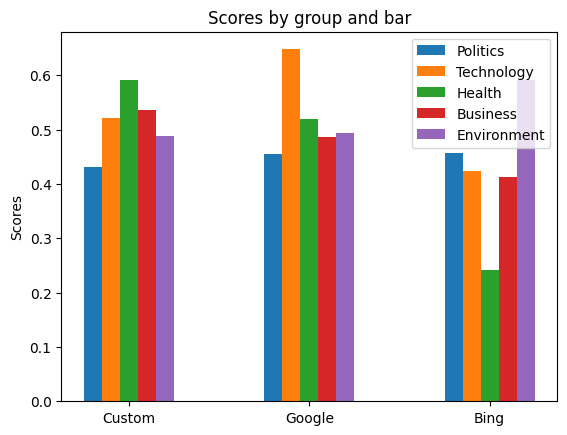

In [10]:
#Visualisation
import numpy as np

# Data
labels = ['Custom', 'Google', 'Bing']
# bars = []
# for category in data:
#     bars.append([origin.similarity for origin in category.origin])

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
rects1 = ax.bar(x - 2*width, [0.4311743378639221,0.45413678884506226,0.4573930421223243], width, label=categories[0])
rects2 = ax.bar(x - width, [0.5211619436740875,0.6476427316665649,0.42310677468776703], width, label=categories[1])
rects3 = ax.bar(x, [0.29083233575026196,0.5185126960277557,0.24163639545440674], width, label=categories[2])
rects4 = ax.bar(x + width, [0.5358111262321472,0.48547375202178955,0.4126548046867053], width, label=categories[3])
rects5 = ax.bar(x + 2*width, [0.4882107575734456,0.49299340570966405,0.5917054414749146], width, label=categories[4])

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Scores by group and bar')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()


In [ ]:
# LLM analysis

summaryTOArticleSimilarity = {'gemini':[],'gpt3.5':[]}

for category in data:
    for llm in ["gemini","gpt3.5"]:
        # articles = category.origin[0].data
        # summary = await summarize(articles,category.query,llm)
        # sim = similarity(articles,summary)
        summaryTOArticleSimilarity[llm].append(random.random() if flag else similarity)

In [ ]:
labels = ['Gemini', 'GPT']
bars = []
for category in range(5):
    bars.append([x[category] for x in summaryTOArticleSimilarity.values()])

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
rects1 = ax.bar(x - 2*width, bars[0], width, label=categories[0])
rects2 = ax.bar(x - width, bars[1], width, label=categories[1])
rects3 = ax.bar(x, bars[2], width, label=categories[2])
rects4 = ax.bar(x + width, bars[3], width, label=categories[3])
rects5 = ax.bar(x + 2*width, bars[4], width, label=categories[4])

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Scores by group and bar')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()

In [8]:
from datasets import load_dataset
dataset = load_dataset("glue", "stsb")

# Similarity.custom_similarity("Hello To you all","Greetings to everyone")

In [10]:
test_dataset = list(dataset['validation'])[:100]

test_dataset

[{'sentence1': 'A man with a hard hat is dancing.',
  'sentence2': 'A man wearing a hard hat is dancing.',
  'label': 5.0,
  'idx': 0},
 {'sentence1': 'A young child is riding a horse.',
  'sentence2': 'A child is riding a horse.',
  'label': 4.75,
  'idx': 1},
 {'sentence1': 'A man is feeding a mouse to a snake.',
  'sentence2': 'The man is feeding a mouse to the snake.',
  'label': 5.0,
  'idx': 2},
 {'sentence1': 'A woman is playing the guitar.',
  'sentence2': 'A man is playing guitar.',
  'label': 2.4000000953674316,
  'idx': 3},
 {'sentence1': 'A woman is playing the flute.',
  'sentence2': 'A man is playing a flute.',
  'label': 2.75,
  'idx': 4},
 {'sentence1': 'A woman is cutting an onion.',
  'sentence2': 'A man is cutting onions.',
  'label': 2.615000009536743,
  'idx': 5},
 {'sentence1': 'A man is erasing a chalk board.',
  'sentence2': 'The man is erasing the chalk board.',
  'label': 5.0,
  'idx': 6},
 {'sentence1': 'A woman is carrying a boy.',
  'sentence2': 'A woman is

In [17]:
from IPython.display import clear_output
import numpy as np

true_similarity = np.array([val['label'] / 5 for val in test_dataset])
fine_tuned_similarity = np.empty(len(test_dataset))
st_similarity = np.empty(len(test_dataset))
index = 0

for idx,row in enumerate(test_dataset):
    st_similarity[idx]=float(Similarity.st_similarity([row['sentence1']],[row['sentence2']])[0][0])
    fine_tuned_similarity[idx]=Similarity.custom_similarity(row['sentence1'],row['sentence2'])
    
    clear_output()
    print(f"----Row {index}-----")
    index+=1

print(true_similarity, fine_tuned_similarity, st_similarity)


----Row 99-----
[1.         0.95       1.         0.48000002 0.55       0.523
 1.         0.46659999 0.75       1.         0.64000001 0.31659999
 1.         1.         0.98179998 0.16       0.48000002 1.
 0.8        0.1272     0.6        0.3428     0.64000001 0.43340001
 0.2        0.38340001 0.85       0.6        0.2        0.12
 0.51999998 1.         0.91999998 1.         0.96000004 0.75999999
 1.         1.         0.83999996 0.28       0.71999998 0.55999999
 0.32       0.6        0.28       0.05       0.05       0.
 0.8        0.9        0.1        0.75999999 0.96000004 1.
 0.05       0.24000001 0.12       0.16       0.75999999 0.
 0.7        0.9        0.55999999 0.75999999 0.75999999 0.
 0.8        0.85       0.56240001 0.85       0.6        0.2
 0.75       0.         0.08       0.8        0.55999999 0.75
 0.23080001 0.55       0.55999999 0.         0.         0.68000002
 1.         0.16       0.45       0.55       0.9        0.51999998
 0.75999999 0.55999999 0.32       0.       

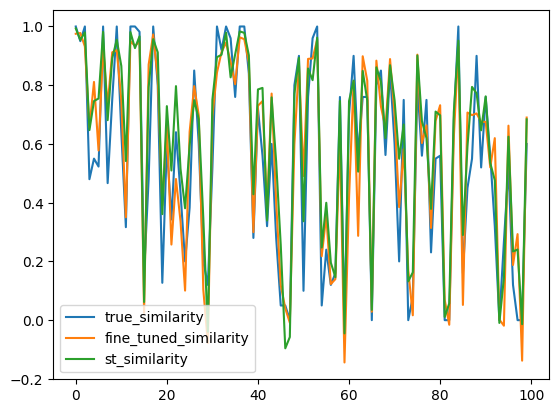

In [18]:
import numpy as np


plt.plot(true_similarity,label="true_similarity")
plt.plot(fine_tuned_similarity,label="fine_tuned_similarity")
plt.plot(st_similarity,label="st_similarity")

plt.legend()

plt.show()

In [19]:
delta_fine_tune = true_similarity - fine_tuned_similarity
delta_st = true_similarity - st_similarity

max_similarity = (fine_tuned_similarity+st_similarity)/2
delta_max = true_similarity - max_similarity


print("Mean deviation of fine tuned model from true value:")
print("\tSigned",np.mean(delta_fine_tune))
print("\tUnsigned",np.mean(np.absolute(delta_fine_tune)))
print("Mean deviation of sentence transformer from true value")
print("\tSigned",np.mean(delta_st))
print("\tUnsigned",np.mean(np.absolute(delta_st)))
print("Mean deviation of max from true value")
print("\tSigned",np.mean(delta_max))
print("\tUnsigned",np.mean(np.absolute(delta_max)))


Mean deviation of fine tuned model from true value:
	Signed -0.023674101000651714
	Unsigned 0.11301079672761262
Mean deviation of sentence transformer from true value
	Signed -0.06486946834251285
	Unsigned 0.10794956568256021
Mean deviation of max from true value
	Signed -0.044271784671582284
	Unsigned 0.10251116488408299


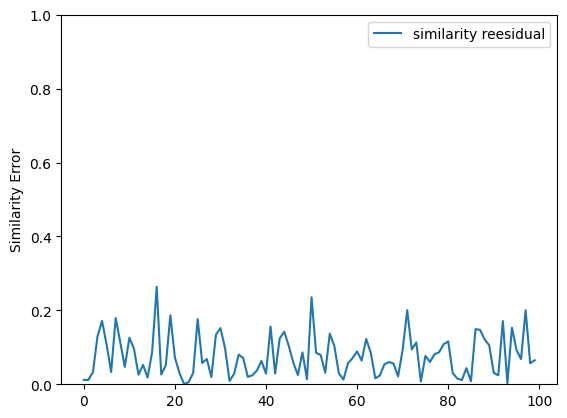

In [28]:
def reduce(shit):
    return [abs(shiter*0.75) for shiter in shit]

# plt.plot(reduce(delta_fine_tune),label="fine_tuned")
# plt.plot(reduce(delta_st),label="st")
plt.plot(reduce(delta_max),label="similarity error")

plt.ylim(0,1)
plt.ylabel("Similarity Error")

plt.legend()

plt.show()


In [5]:
Similarity.document_similarity(["Hello","Goodbye"],["Hi","Farewell"])

[[0.7966319918632507, 0.3645547032356262],
 [0.3647688627243042, 0.8542084693908691]]

In [13]:
a= [[0.4311743378639221,0.45413678884506226,0.4573930421223243],
[0.5211619436740875,0.6476427316665649,0.42310677468776703],
[0.29083233575026196,0.5185126960277557,0.24163639545440674],
[0.5358111262321472,0.48547375202178955,0.4126548046867053],
[0.4882107575734456,0.49299340570966405,0.5917054414749146]]

print("Custom",sum([x[0] for x in a ])/5)
print("Google",sum([x[1] for x in a ])/5)
print("Bing",sum([x[2] for x in a ])/5)

Custom 0.4534381002187729
Google 0.5197518748541673
Bing 0.42529929168522357


In [6]:
sentences_pairs = [
    ["Hello and Goodbye", "Hi and Farewell"],
    ["Cat leaped onto table seeing mouse.", "The cat jumped at a mouse on the table."],
    ["He excels in math, winning awards.", "Proficient in math, he receives accolades."],
    ["Concert was delightful; audience cheered.", "Performance was wonderful, crowd applauded."],
]

for pair in sentences_pairs:
    print(Similarity.custom_similarity(*pair))


0.8231511116027832
0.7566490173339844
0.8611764907836914
0.8009404540061951
0.7374570369720459
